<a href="https://colab.research.google.com/github/HassanKulu/AI-Coursework-2025/blob/main/Stars_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning and Exploratory Data Analysis

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# URL for the raw CSV data
url = "https://raw.githubusercontent.com/YBIFoundation/Dataset/main/Stars.csv"

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(url)
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")

# Display the first 5 rows to understand the data
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

Dataset loaded successfully!
   Temperature (K)  Luminosity (L/Lo)  Radius (R/Ro)  Absolute magnitude (Mv)  \
0             3068           0.002400         0.1700                    16.12   
1             3042           0.000500         0.1542                    16.60   
2             2600           0.000300         0.1020                    18.70   
3             2800           0.000200         0.1600                    16.65   
4             1939           0.000138         0.1030                    20.06   

   Star type Star category Star color Spectral Class  
0          0   Brown Dwarf        Red              M  
1          0   Brown Dwarf        Red              M  
2          0   Brown Dwarf        Red              M  
3          0   Brown Dwarf        Red              M  
4          0   Brown Dwarf        Red              M  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtyp

In [3]:
# 1. Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# If there are missing values, you could drop the rows:
# df.dropna(inplace=True)
# Or fill them if it makes sense (e.g., with the mean or mode)
# df['Temperature'].fillna(df['Temperature'].mean(), inplace=True)


# 2. Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Remove duplicate rows if any
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")


# 3. Check data types and unique values for categorical columns
# From df.info(), 'Star color' and 'Spectral Class' are likely 'object' types.
# Let's inspect their unique values for inconsistencies.

print(f"\nUnique values in 'Star color':")
print(df['Star color'].unique())

print(f"\nUnique values in 'Spectral Class':")
print(df['Spectral Class'].unique())

# You might find inconsistencies like 'Blue-white' vs 'Blue-White'.
# We can clean them up.
df['Star color'] = df['Star color'].str.strip().str.replace('Blue-white', 'Blue-White')
# Add more cleaning lines as needed based on your unique values.


# 4. (Optional) Rename columns for easier use
# The dataset uses 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)'. Let's make them more descriptive.
df.rename(columns={
    'Luminosity (L/Lo)': 'Luminosity',
    'Radius (R/Ro)': 'Radius',
    'Absolute magnitude (Mv)': 'Absolute_Magnitude'
}, inplace=True)

print("\nData cleaning complete. Updated DataFrame info:")
print(df.info())

Missing values per column:
Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

Number of duplicate rows: 0

Unique values in 'Star color':
['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'Blue ' 'yellowish' 'Yellowish'
 'Orange-Red' 'Blue white ' 'Blue-White']

Unique values in 'Spectral Class':
['M' 'B' 'A' 'F' 'O' 'K' 'G']

Data cleaning complete. Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature (K)     240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius        

Exploratory Data Analysis

In [4]:
# Get descriptive statistics for numerical columns
print(df.describe())

       Temperature (K)     Luminosity       Radius  Absolute_Magnitude  \
count       240.000000     240.000000   240.000000          240.000000   
mean      10497.462500  107188.361635   237.157781            4.382396   
std        9552.425037  179432.244940   517.155763           10.532512   
min        1939.000000       0.000080     0.008400          -11.920000   
25%        3344.250000       0.000865     0.102750           -6.232500   
50%        5776.000000       0.070500     0.762500            8.313000   
75%       15055.500000  198050.000000    42.750000           13.697500   
max       40000.000000  849420.000000  1948.500000           20.060000   

        Star type  
count  240.000000  
mean     2.500000  
std      1.711394  
min      0.000000  
25%      1.000000  
50%      2.500000  
75%      4.000000  
max      5.000000  


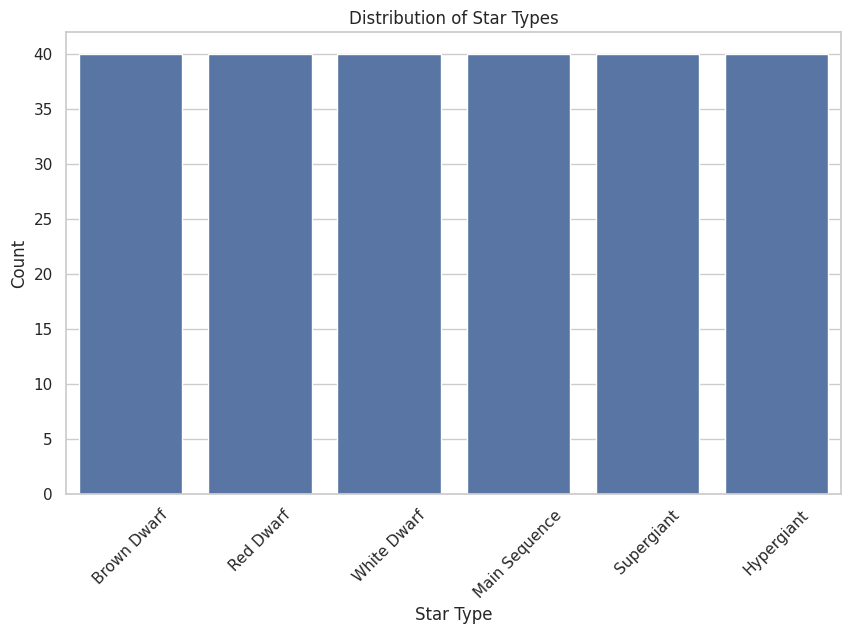

In [6]:
# Create a count plot for the 'Star type' column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Star type')

# Add labels for clarity (assuming the encoding above)
type_labels = ['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiant', 'Hypergiant']
plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Distribution of Star Types')
plt.xlabel('Star Type')
plt.ylabel('Count')
plt.show()

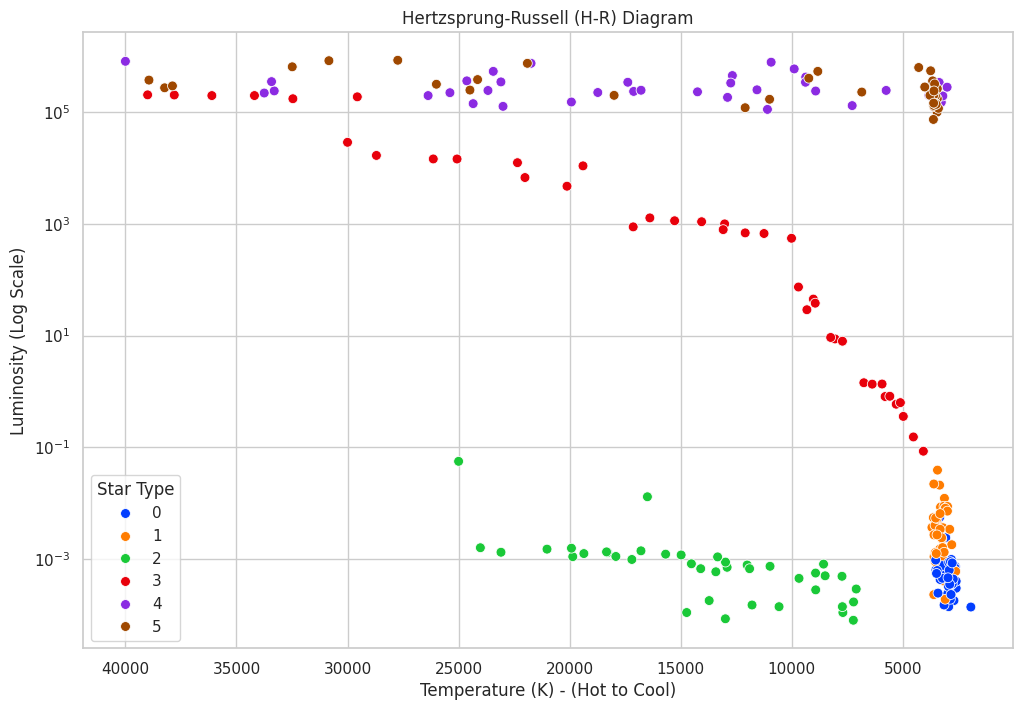

In [8]:
# Create a scatter plot of Temperature vs. Luminosity
# We'll use 'Type' to color-code the points.
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Temperature (K)', y='Luminosity', hue='Star type', palette='bright', s=50)

# The H-R diagram often uses a log scale for luminosity
plt.yscale('log')
# The H-R diagram plots temperature decreasing to the right
plt.gca().invert_xaxis()

plt.title('Hertzsprung-Russell (H-R) Diagram')
plt.xlabel('Temperature (K) - (Hot to Cool)')
plt.ylabel('Luminosity (Log Scale)')
plt.legend(title='Star Type')
plt.show()

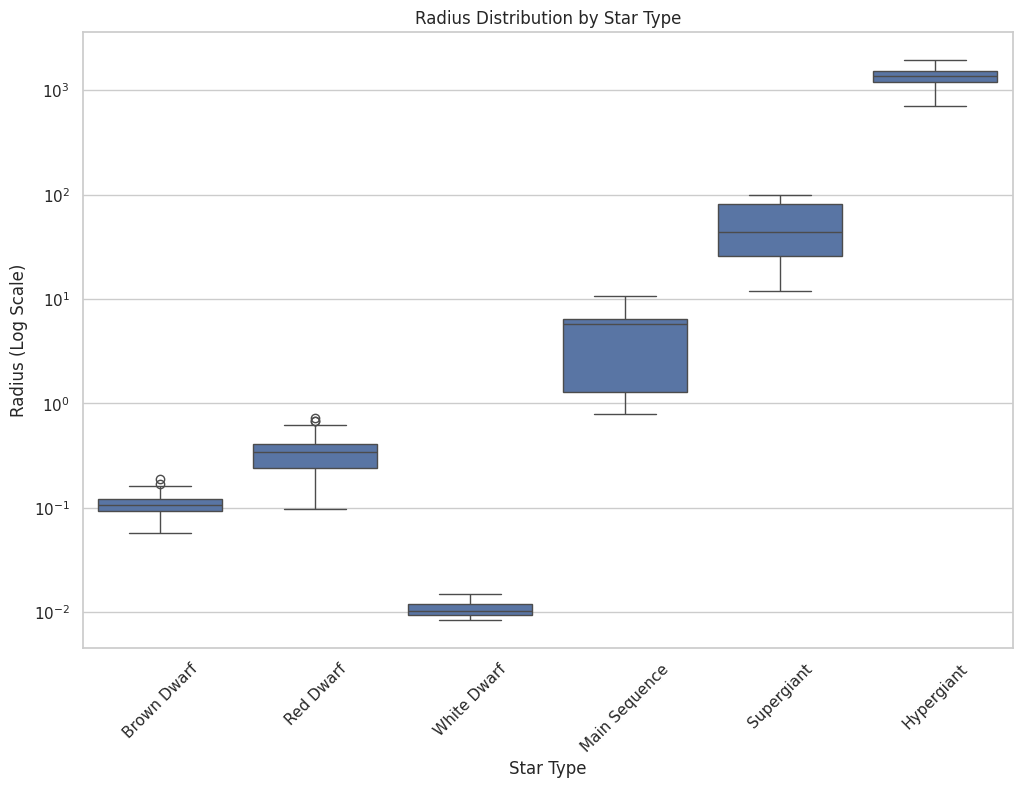

In [10]:
# Create a box plot for 'Star type' vs 'Radius'
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Star type', y='Radius')

# Use a log scale for Radius due to extreme differences
plt.yscale('log')

plt.xticks(ticks=range(6), labels=type_labels, rotation=45)
plt.title('Radius Distribution by Star Type')
plt.xlabel('Star Type')
plt.ylabel('Radius (Log Scale)')
plt.show()

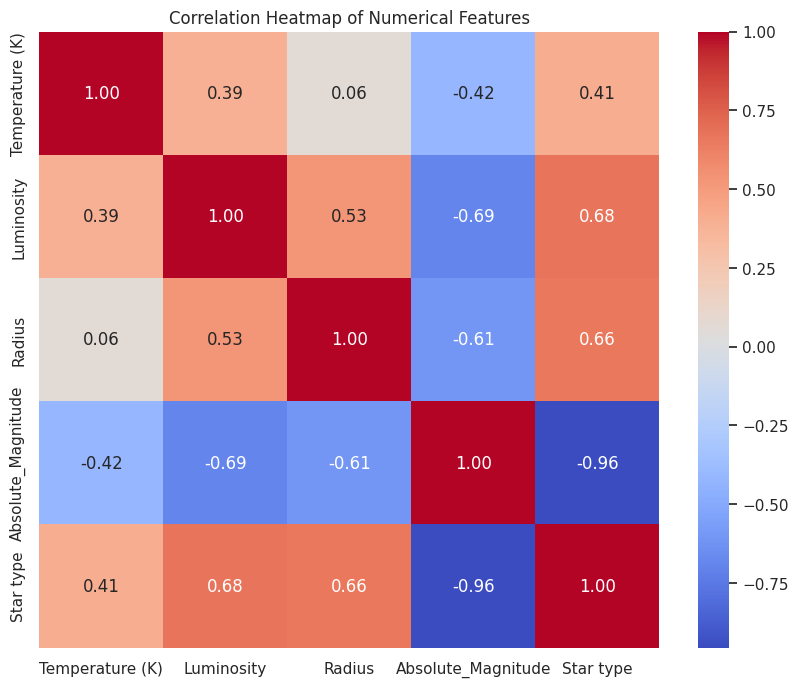

In [11]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()